Preview data and plot correlation plot for source of PM2.5

In [1]:
#Import package
import sys
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series

In [2]:
train_data = pd.read_csv('train.csv', delimiter= ',', header= 0,encoding = 'big5')
train_data.shape
#train_data.head()

(4320, 27)

Need to remove the date and measuremental stations to reorganize the data metric

In [3]:
train_data.drop(train_data.columns[[0, 1]], axis=1, inplace = True)

In [4]:
train_data.shape

(4320, 25)

Here, we could 18 features/ pollutions source in this data

In [5]:
feature =train_data['測項'].unique()
len(feature)

18

Combine 12 month* 20 day* 24 hour = 5760 data into array(5760,1)

In [6]:
train_data1 = train_data[train_data['測項'] == 'AMB_TEMP']
train_data1.head()
train_data1 = train_data1.drop(['測項'], axis=1)

In [7]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,14,14,14,13,12,12,12,12,15,17,...,22,22,21,19,17,16,15,15,15,15
18,16,15,15,14,14,15,16,16,17,20,...,24,24,23,21,20,19,18,18,18,18
36,18,18,18,18,18,18,18,19,19,20,...,24,22,22,21,20,20,20,20,20,19
54,19,18,18,17,17,16,17,17,18,18,...,19,18,18,16,16,15,15,15,14,13
72,13,12,13,12,12,12,12,13,14,16,...,21,20,19,17,16,16,15,14,14,13


In [8]:
train_data1 = np.array(train_data1).astype(float).reshape(5760,)
train_data1

array([14., 14., 14., ..., 13., 13., 13.])

recreate train_metric (18, 5760) and replace nan with zero

In [9]:
Re_train_data =pd.DataFrame(np.zeros([480*12, len(feature)]), columns = feature)

In [10]:
for i in feature:
    train_data1 = train_data[train_data['測項'] == i]
    # Be careful with the inplace, as it destroys any data that is dropped!
    train_data1 = train_data1.drop(['測項'], axis=1)
    train_data1 = np.array(train_data1)
    train_data1[train_data1 == 'NR'] = '0'
    train_data1 = train_data1.astype(float)
    train_data1 = train_data1.reshape(5760,) # 24*240=5760
    train_data1 = train_data1.T
    Re_train_data[i] = train_data1

Calculate the correlation between all features

In [11]:
corr = Re_train_data.corr()
corr

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
AMB_TEMP,1.000000,-0.409298,-0.002863,0.082424,-0.023659,-0.129846,-0.113840,0.224788,0.084691,-0.017127,0.004003,-0.225710,0.287746,-0.223133,0.360292,0.339646,0.280409,0.369668
CH4,-0.409298,1.000000,0.126959,0.196183,0.101720,0.298684,0.274580,0.014692,0.220376,0.254657,-0.033348,-0.001729,0.021025,0.776974,-0.068098,-0.081634,-0.221642,-0.258649
CO,-0.002863,0.126959,1.000000,0.459006,0.256951,0.401150,0.405052,0.077529,0.274418,0.283119,-0.018305,-0.089177,0.364416,0.349852,0.079935,0.081239,0.004908,0.044476
NMHC,0.082424,0.196183,0.459006,1.000000,0.445830,0.673149,0.683953,-0.046030,0.336524,0.291778,-0.009749,-0.056915,0.321194,0.709745,0.189240,0.174706,-0.064140,-0.023633
NO,-0.023659,0.101720,0.256951,0.445830,1.000000,0.491352,0.703006,-0.232499,0.048311,0.029970,0.014075,0.012208,0.256549,0.324725,0.151808,0.142942,-0.074728,-0.074452
NO2,-0.129846,0.298684,0.401150,0.673149,0.491352,1.000000,0.963312,-0.101601,0.464207,0.449113,-0.021160,-0.000337,0.427541,0.591057,0.218270,0.187914,-0.289601,-0.261985
NOx,-0.113840,0.274580,0.405052,0.683953,0.703006,0.963312,1.000000,-0.152602,0.393517,0.375564,-0.011963,0.003386,0.426321,0.580241,0.224233,0.197045,-0.259386,-0.237106
O3,0.224788,0.014692,0.077529,-0.046030,-0.232499,-0.101601,-0.152602,1.000000,0.370415,0.356670,-0.032591,-0.670286,0.180083,-0.008989,0.277488,0.271440,0.300232,0.171200
PM10,0.084691,0.220376,0.274418,0.336524,0.048311,0.464207,0.393517,0.370415,1.000000,0.776426,-0.046015,-0.310882,0.401285,0.356804,0.228486,0.190368,-0.016560,0.006748
PM2.5,-0.017127,0.254657,0.283119,0.291778,0.029970,0.449113,0.375564,0.356670,0.776426,1.000000,-0.062654,-0.264196,0.370831,0.352159,0.186138,0.156990,-0.084703,-0.045458


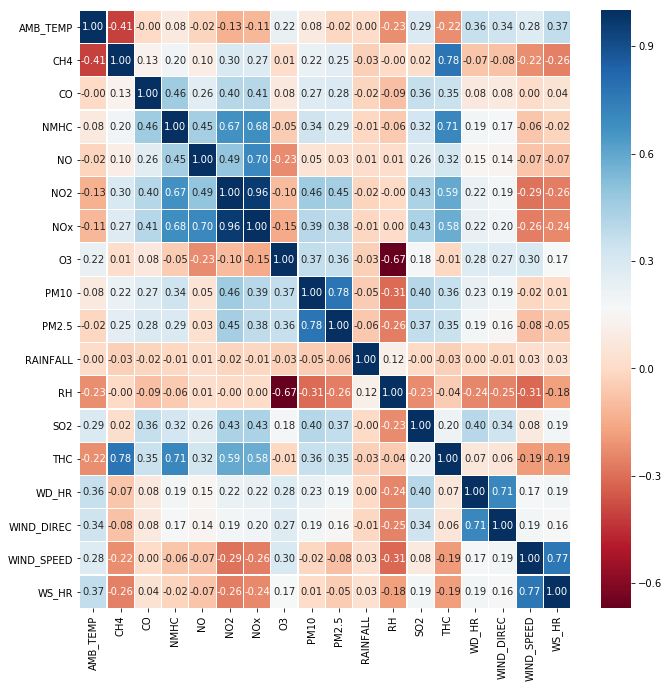

In [12]:
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, fmt=".2f", linewidth=0.2, cmap='RdBu', annot=True)

We could see the positive relation between NO2, NOx, O3, PM10,SO2, THC and PM2.5. Especially PM10 particles pollutions is highest related to pm2.5 caused bt the fine particles. All of NO2, NOx, NO, SO2 are the regular sources of air pollution and greenhouse gases, and they are positive related to air pollution and negative to air quality. O3 near main land is the product of the traffic pollution and industrial pollutions, which is reasonable to have the positive relations with paticles pollutions as PM10 and PM2.5. It iw worth meaning that rain fall, wind speed and wind speed per hour effetively decreases the PM2.5.